# Data Pre-processing

In [5]:
import pandas as pd

def readXlsx(excel_file):
    return pd.read_excel(excel_file)

def clean(data_file):
    data_file = data_file.iloc[2:,:]
    data_file.columns = ['Date', 'Symbol', 'Warehouse', 'ProductionYear', 'Open', 'Close', 'High', 'Low', 'Change', 'PercentageChange', 'Volume']
    return data_file

data_file_cof = clean(readXlsx('Datasets/Coffee/Coffee-2012.xlsx'))
data_file_cof_2013 = clean(readXlsx('Datasets/Coffee/Coffee-2013.xlsx'))
data_file_cof_2014 = clean(readXlsx('Datasets/Coffee/Coffee-2014.xlsx'))
data_file_cof_2015 = clean(readXlsx('Datasets/Coffee/Coffee-2015.xlsx'))
data_file_cof_2016 = clean(readXlsx('Datasets/Coffee/Coffee-2016.xlsx'))
data_file_cof_2017 = clean(readXlsx('Datasets/Coffee/Coffee-2017.xlsx'))
data_file_cof_2018 = clean(readXlsx('Datasets/Coffee/Coffee-2018.xlsx'))
data_file_cof_2019 = clean(readXlsx('Datasets/Coffee/Coffee-2019.xlsx'))

data_file_cof = data_file_cof.append([data_file_cof_2013, data_file_cof_2014, data_file_cof_2015, data_file_cof_2016, data_file_cof_2017, data_file_cof_2018, data_file_cof_2019])
data_file_cof.index = [i for i in range(1, data_file_cof.shape[0]+1)]
data_file_cof.head()

,Date,Symbol,Warehouse,ProductionYear,Open,Close,High,Low,Change,PercentageChange,Volume
1,2012-01-02 00:00:00,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,28.29
2,2012-01-03 00:00:00,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,10.8
3,2012-01-04 00:00:00,WYKQ2,BG,2004,"1,180.00",0.00,"1,180.00","1,180.00",0,0.0,6.61
4,2012-01-06 00:00:00,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,8.99
5,2012-01-12 00:00:00,WYKQ2,BG,2004,"1,293.00",0.00,"1,293.00","1,280.00",0,0.0,18.0


In [6]:
import numpy as np
sr = data_file_cof.Symbol.value_counts(sort=True)
sr

LUBP4      1482
LUBP3      1455
WSDA3      1321
ULK5       1306
WSDB3      1279
           ... 
USWYCA5       1
USUHRA9       1
USUHRC8       1
USUSDE7       1
SWSDB5        1
Name: Symbol, Length: 719, dtype: int64

LUBP, WSDA and ULK Highest number of trades. 

In [10]:
data_file_cof_lubp = data_file_cof.loc[data_file_cof['Symbol'].str.contains('LUBP'), :]
data_file_cof_wsda = data_file_cof.loc[data_file_cof['Symbol'].str.contains('WSDA'), :]
data_file_cof_ulk = data_file_cof.loc[data_file_cof['Symbol'].str.contains('WYCA'), :]

As seen on the 'Symbol' column, there are different types of Coffee in the dataset. Identify those whose price-movements are correlated and use them to train the model with. Daily data is also troublesome to deal with. Resample the data frames into weekly format to ease work and improve performance. Since commodity price trends usually occur over a span of weeks and months, this should have little impact on the model accuracy.

In [43]:
data_file_lubp_temp = data_file_cof_lubp.copy()
data_file_wsda_temp = data_file_cof_wsda.copy()
data_file_ulk_temp = data_file_cof_ulk.copy()

data_file_lubp_temp['Date'] = pd.to_datetime(data_file_cof_lubp['Date'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime('%Y/%m/%d')
data_file_lubp_temp.drop(['Close'], axis=1, inplace=True)
data_file_wsda_temp['Date'] = pd.to_datetime(data_file_cof_wsda['Date'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime('%Y/%m/%d')
data_file_wsda_temp.drop(['Close'], axis=1, inplace=True)
data_file_ulk_temp['Date'] = pd.to_datetime(data_file_ulk_temp['Date'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime('%Y/%m/%d')
data_file_ulk_temp.drop(['Close'], axis=1, inplace=True)

def toNumeric(col):
    str_col = [str(x) for x in col]
    float_col = []
    for x in str_col:
        if x.find(',') != -1:
            var = x[0:x.find(',')] + x[x.find(',')+1:]
            float_col.append(float(var))
        else:
            float_col.append(x)
    return pd.to_numeric(float_col)

data_file_lubp_temp['Open'] = toNumeric(data_file_lubp_temp.Open)
data_file_lubp_temp['Volume'] = toNumeric(data_file_lubp_temp.Volume)
data_file_wsda_temp['Open'] = toNumeric(data_file_wsda_temp.Open)
data_file_wsda_temp['Volume'] = toNumeric(data_file_wsda_temp.Volume)
data_file_ulk_temp['Open'] = toNumeric(data_file_ulk_temp.Open)
data_file_ulk_temp['Volume'] = toNumeric(data_file_ulk_temp.Volume)

data_file_lubp_temp = data_file_lubp_temp.sort_values(by='Date')
data_file_wsda_temp = data_file_wsda_temp.sort_values(by='Date')
data_file_ulk_temp = data_file_ulk_temp.sort_values(by='Date')
data_file_lubp_temp = data_file_lubp_temp.set_index('Date')
data_file_wsda_temp = data_file_wsda_temp.set_index('Date')
data_file_ulk_temp = data_file_ulk_temp.set_index('Date')

data_file_cof_lubp = pd.DataFrame(data_file_lubp_temp['Open'].resample('W').mean())
data_file_cof_lubp['Symbol'] = data_file_lubp_temp['Symbol'].resample('W').first()
data_file_cof_lubp['Volume'] = data_file_lubp_temp['Volume'].resample('W').mean()

data_file_cof_wsda = pd.DataFrame(data_file_wsda_temp['Open'].resample('W').mean())
data_file_cof_wsda['Symbol'] = data_file_wsda_temp['Symbol'].resample('W').first()
data_file_cof_wsda['Volume'] = data_file_wsda_temp['Volume'].resample('W').mean()

data_file_cof_ulk = pd.DataFrame(data_file_ulk_temp['Open'].resample('W').mean())
data_file_cof_ulk['Symbol'] = data_file_ulk_temp['Symbol'].resample('W').first()
data_file_cof_ulk['Volume'] = data_file_ulk_temp['Volume'].resample('W').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

# Exploratory Data Analysis

Below is a chart depicting the correlation between the LUBP coffee standards

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

def plotDataFrame(data_frames, color):
    fig = plt.figure(figsize=(20,10))
    for data_file, c in zip(data_frames, color):
        row = data_file.iloc[1:2, :]
        val = str(row['Symbol'].values)
        label = val[2:-2]
        plt.plot(data_file.index, data_file['Open'], c=c, label=label)
    plt.legend()
    plt.show()

def separateTypes(data_file_cof_type):
    sr = data_file_cof_type.Symbol.value_counts(sort=True)
    print(len(sr))
    data_frames_type = []
    for item in sr.iteritems():
        data_file_item = data_file_cof_type.loc[data_file_cof_type['Symbol'] == item[0], :]
        data_file_item.Open = pd.to_numeric(data_file_item.Open)
        data_frames_type.append(data_file_item)
    return data_frames_type

In [15]:
data_frames_lubp = separateTypes(data_file_cof_lubp)
count = 0
color = cm.rainbow(np.linspace(0, 1, len(data_frames_lubp)))

plotDataFrame(data_frames_lubp, color)

20


ValueError: Unable to parse string "1,040.00" at position 4

Below is a chart depicting the correlation between the WSDA coffee standards

In [16]:
data_frames_wsda = separateTypes(data_file_cof_wsda)
count = 0
color = cm.rainbow(np.linspace(0, 1, len(data_frames_wsda)))

plotDataFrame(data_frames_wsda, color)

23


ValueError: Unable to parse string "1,090.00" at position 0

Below is a chart depicting the correlation between the ULK coffee standards

In [17]:
data_frames_ulk = separateTypes(data_file_cof_ulk)

count = 0
color = cm.rainbow(np.linspace(0, 1, len(data_frames_ulk)))

plotDataFrame(data_frames_ulk, color)

11


ValueError: Unable to parse string "1,150.00" at position 0

Below is a chart depicting the correlation between the Total Volume of the three coffee standards

In [ ]:
volume_lubp = data_file_cof_lubp.Volume.sum()
volume_ulk = data_file_cof_ulk.Volume.sum()
volume_wsda = data_file_cof_wsda.Volume.sum()

volume_frames = [volume_lubp, volume_ulk, volume_wsda]
volume_ticks = ('LUBP', 'ULK', 'WSDA')

x = [0, 1, 2]
fig, ax = plt.subplots() 
plt.bar(x, volume_frames)
plt.xticks(x, volume_ticks)
plt.show()
 

## Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

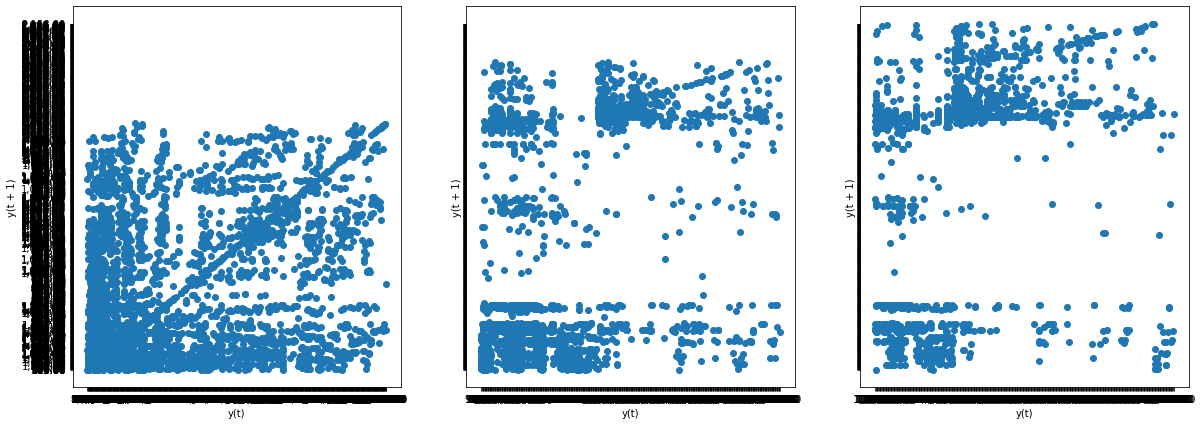

In [18]:
from pandas.plotting import lag_plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

lag_plot(data_file_cof_lubp['Open'], ax=ax1)
lag_plot(data_file_cof_wsda['Open'], ax=ax2)
lag_plot(data_file_cof_ulk['Open'], ax=ax3)

## Seasonal Decompositions

Taken individually, the coffee standard types are sparsely traded. But since we know their prices to be almost equal and
proportionally traded, we will use the integrated dataframe to find hidden patterns

In [20]:
import statsmodels.api as sm

y_lubp = data_file_cof_lubp['Open']
y1 = y_lubp.loc[y_lubp.index < '2019-01-01']
decompose = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decompose.plot()
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

The WSDA and ULK coffee types have missing values so deal with them before performing seasonal decomposition

In [21]:
data_file_cof_wsda = data_file_cof_wsda.fillna(method='pad')
y_wsda = data_file_cof_wsda['Open']
y2 = y_wsda.loc[y_wsda.index < '2019-01-01']
decompose = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decompose.plot()
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [22]:
data_file_cof_ulk = data_file_cof_ulk.fillna(method='pad')
y_ulk = data_file_cof_ulk['Open']
y3 = y_ulk.loc[y_ulk.index < '2019-01-01']
decompose = sm.tsa.seasonal_decompose(y3, model='additive')
fig = decompose.plot()
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

Perform Grid Search to find the optimal non-seasonal and seasonal parameters.

In [24]:
import itertools
import statsmodels.api as sm

p, d, q = range(0, 5), range(0, 3), range(0, 3), 
sp, sd, sq = range(0, 5), range(0, 3), range(0, 2)
pdq, s_pdq = list(itertools.product(p, d, q)), list(itertools.product(sp, sd, sq, ))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in s_pdq]
lowest_aic = 10000
optimal, optimal_seasonal = (0, 0, 0), (0, 0, 0)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y1,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results = mod.fit()
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            optimal = param
            optimal_seasonal = param_seasonal
            
        print('{}x{}-{}'.format(param, param_seasonal, results.aic))
print('lowest AIC = {}, params = {}, seasonal params = {}'.format(lowest_aic, optimal, optimal_seasonal))

NameError: name 'y1' is not defined

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y1,
                               order=(3, 2, 1),
                               seasonal_order = (4, 1, 1, 52),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
result_lubp = mod.fit()
print(result_lubp.aic)
result_lubp.summary().tables[1]

The output above suggests that SARIMAX(4, 2, 2)x(4, 2, 1, 52) yields the lowest AIC value of 568.74. Therefore we should take that as the optimal values

In [25]:
results_lubp.plot_diagnostics(figsize=(20, 7))
plt.show()

NameError: name 'results_lubp' is not defined

In [26]:
p = d = q = range(0, 5)
sp, sd, sq = range(0, 5), range(0, 3), range(0, 2)
pdq = itertools.product(p, d, q)
seasonal_pdq = itertools.product(sp, sd, sq, range(52, 53))
lowest_aic = 10000
optimal, optimal_seasonal = (0, 0, 0), (0, 0, 0)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y2,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results_wsda = mod.fit()
        
        if results_wsda.aic < lowest_aic:
            lowest_aic = results_wsda.aic
            optimal = param
            optimal_seasonal = param_seasonal
            
print('lowest AIC = {}, params = {}, seasonal params = {}'.format(lowest_aic, optimal, optimal_seasonal))

NameError: name 'y2' is not defined

In [27]:
model = sm.tsa.statespace.SARIMAX(y2,
                                 order=(4, 2, 2),
                                 seasonal_order=(4, 2, 1, 52),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results_wsda = model.fit()
print(results_wsda.aic)
results_wsda.summary().tables[1]

NameError: name 'y2' is not defined

In [28]:
fig = results_wsda.plot_diagnostics(figsize=(20, 7))
plt.show()

NameError: name 'results_wsda' is not defined

In [29]:
p = range(0, 5)
d = range(0, 3)
q = range(0, 3)
m = range(52, 53)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = (itertools.product(p, d, range(0, 2), m))
lowest_aic = 10000
optimal, optimal_seasonal = (0, 0, 0), (0, 0, 0)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y3,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results_ulk = mod.fit()
        
        if results_ulk.aic < lowest_aic:
            lowest_aic = results_ulk.aic
            optimal = param
            optimal_seasonal = param_seasonal
        
print('lowest AIC = {}, params = {}, seasonal params = {}'.format(lowest_aic, optimal, optimal_seasonal))     

NameError: name 'y3' is not defined

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y3,
                               order=(3, 1, 1),
                               seasonal_order=(4, 2, 1, 52),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results_ulk = mod.fit()
print(results_ulk.aic)
results_ulk.summary().tables[1]

In [30]:
pred_ulk = results_ulk.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
ax = y_ulk['2019':].plot(label='WYCA observed')
pred_ulk.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

NameError: name 'results_ulk' is not defined

## Validating forecasts

In [ ]:
pred_lubp = result_lubp.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
pred_lubp_ci = pred_lubp.conf_int()

ax = y_lubp['2019':].plot(label='LUBP observed')
pred_lubp.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.8, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [ ]:
pred_wsda = results_wsda.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
pred_wsda_ci = pred_wsda.conf_int()

ax = y_wsda['2019':].plot(label='WSDA observed')
pred_wsda.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [31]:
pred_ulk = results_ulk.get_prediction(start=pd.to_datetime('2019-01-06'), end=pd.to_datetime('2019-09-15'), dynamic=False)
pred_ci_ulk = pred_ulk.conf_int()
ax = y_ulk['2019':].plot(label='WYCA observed')
pred_ulk.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(20, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

NameError: name 'results_ulk' is not defined

Calculate the Mean Absolute Percentage Errors (MAPE)

In [ ]:
predictions = list(pred_lubp.predicted_mean)
response = list(y_lubp['2019':])

mape = 0
for pred, resp in zip(predictions, response):
    mape += abs(pred - resp) / resp * 100
mape /= len(predictions)
mape

In [ ]:
predictions_wsda = list(pred_wsda.predicted_mean)
response_wsda = list(y_wsda['2019':])

mape_wsda = 0
for pred, resp in zip(predictions_wsda, response_wsda):
    mape_wsda += abs(pred - resp) / resp * 100
mape_wsda /= len(predictions_wsda)
mape_wsda

In [ ]:
predictions_wyca = list(pred_ulk.predicted_mean)
response_wyca = list(y_ulk['2019':])

mape_wyca = 0
for pred, resp in zip(predictions_wyca, response_wyca):
    mape_wyca += abs(pred - resp) / resp * 100
mape_wyca /= len(predictions_wyca)
mape_wyca